# MINI PROJECT ( CLASSIFICATION )

# PROBLEM ={ We have customer data of bank ,we are keen to find the   
# insights from the customer data to identify those customers
# who are likely to leave (churn). }


### importing the libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("DS3_C6_S2_Classification_BankChurn_Data_Project.csv")

In [3]:
df.shape

(10000, 13)

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA PREPROCESSSING 

# handling missing values 

In [5]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df['CustomerId'].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319],
      dtype=int64)

In [7]:
df['CustomerId'].value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [8]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [9]:
df['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [10]:
for i in df['Surname']:
    print(i)

Hargrave
Hill
Onio
Boni
Mitchell
Chu
Bartlett
Obinna
He
H?
Bearce
Andrews
Kay
Chin
Scott
Goforth
Romeo
Henderson
Muldrow
Hao
McDonald
Dellucci
Gerasimov
Mosman
Yen
Maclean
Young
Nebechi
McWilliams
Lucciano
Azikiwe
Odinakachukwu
Sanderson
Maggard
Clements
Lombardo
Watson
Lorenzo
Armstrong
Cameron
Hsiao
Clarke
Osborne
Lavine
Bianchi
Tyler
Martin
Okagbue
Yin
Buccho
Chidiebele
Trevisani
O'Brien
Parkhill
Yoo
Phillipps
Tsao
Endrizzi
T'ien
Velazquez
Hunter
Clark
Jeffrey
Pirozzi
Jackson
Hammond
Brownless
Chibugo
Glauert
Pisano
Konovalova
McKee
Palermo
Ballard
Wallace
Cavenagh
Hu
Read
Bushell
Postle
Buley
Leonard
Mills
Onyeorulu
Beit
Ndukaku
Gant
Rowley
Sharpe
Osborne
Heap
Ritchie
Cole
Capon
Capon
Fiorentini
Graham
Yuille
Allard
Fanucci
Fu
Hung
Hung
Bradley
Dunbabin
Mauldon
Stiger
Parsons
Walkom
T'ang
Eremenko
Rowntree
Thorpe
Chiemela
Fanucci
Ko
Welch
Duncan
Chidozie
Wu
Culbreth
Kennedy
Cameron
Calabresi
Zetticci
Fuller
MacDonald
Piccio
Kennedy
Fernie
He
Kaodilinakachukwu
Cocci
Alekseeva
Chinwe

Tsou
Chien
Ubanwa
Kapustin
Calabresi
Hsiao
Grant
H?
Chia
Ugoji
Gregory
Mackay
Nnamutaezinwa
Findlay
Ferri
Ku
Amechi
Kirk
Andrews
Murray
Griffin
Longstaff
McWilliam
Coffee
Hancock
Clark
Creswell
Dodds
Ewen
Carter
Ch'iu
Tsao
Burgess
Fanucci
Blackburn
Bennett
Boniwell
Vasilieva
Longo
Kwemto
Lawrence
Duncan
Bocharova
Morres
Shih
Vogel
T'an
Wisdom
Lorenzo
Shahan
Bryant
Liang
Chidozie
Hayward
Liu
Alexeeva
Calabresi
Lettiere
Chou
Nnamutaezinwa
Nnamutaezinwa
Greece
Yin
Larionova
Golubev
Norman
Capon
Chukwudi
Fedorov
Avdeeva
Reid
Kennedy
Chan
Wofford
Mai
King
T'ao
Hsu
White
Stephens
Frolov
Lombardi
Munro
Hayward
Fields
Onwumelu
Suffolk
Tsao
Judd
Hamilton
T'ang
Degtyarev
Kang
Hudson
Jibunoh
Kinlaw
Chizuoke
Lucciano
Omeokachie
Gorbunova
Tikhonov
Campa
Mancini
Donoghue
Tuan
Johnstone
Romani
Fuller
Baxter
Pirozzi
Sung
Rogers
Mills
Osonduagwuike
Byrne
McIntyre
Aitken
Macintyre
Simpson
Simpson
Metcalfe
Lees
Zetticci
Dale
Byrne
Praed
Laurens
Woods
Bykov
Vorobyova
Pirogova
Sturt
Panicucci
Cook
Hardy
Ch

Hale
K?
Rice
Brown
Sagese
Aksyonova
Findlay
Walker
Hao
Hammer
Abbott
Lucas
Davydova
West
Smith
Mai
Fiorentino
Freeman
Nkemjika
Ramos
Mario
Chien
Dubinina
Wang
Hsieh
Moran
Hung
Moss
Fedorova
Li
Nebechi
Obialo
Bateson
Long
Nelson
Bell
Udinese
Mao
Fanucci
Yeh
Onuoha
Moore
Thornton
Warlow-Davies
Champion
Mazzanti
Macleod
Lei
Lucchese
Lombardo
William
Wright
Ozoemena
Boyle
Chinwendu
Uwaezuoke
Archambault
Ko
Udegbulam
Greene
Hunter
Blinova
DeGaris
Okwudiliolisa
Ts'ai
Tuan
Tseng
Holmwood
Thompson
Y?
Chidubem
Trevisani
Hsiung
Randall
Leach
Godfrey
Wallace
Wei
Mitchell
Light
Capon
Hou
Rowe
Holloway
O'Sullivan
Udinesi
Nwebube
Chibueze
Walker
Gregory
Kuo
Wilson
Lanford
Meng
Yeh
Onwuatuegwu
Goliwe
Anthony
Scott
Genovese
Onyeorulu
Myers
Davey
Parsons
Chikere
Hs?eh
Sal
Ts'ai
Witt
Skelton
Kazantseva
Bowhay
Beyer
Fries
Tao
Kaodilinakachukwu
Ni
Hsueh
Connely
Becker
Clayton
Connolly
Graham
Ch'ien
Manfrin
Kuo
Fomin
Chamberlain
Barber
Zimmer
Brazenor
Cocci
Caldwell
Yirawala
Donaldson
Ozerova
Bruce
Kang
Ro

Panicucci
Piccio
Ramsden
Vorobyova
Todd
Cremonesi
Bradley
Stanley
Jowett
Yefremova
Wilson
Abramovich
Venables
Monnier
Hsieh
Gadsden
Ni
Chibueze
Chinwemma
Kang
Kuo
Ositadimma
Smith
Okwudilichukwu
Porter
Kung
Trevisano
Naylor
Ponomarev
Udinese
Aliyeva
Bailey
Jackson
Yin
Akobundu
Byrne
Robinson
Stephenson
Chiemenam
Forbes
Douglas
Okechukwu
Russell
Ermakova
Oster
Chizoba
Bianchi
Peyser
Cocci
Seleznev
Huang
Alleyne
McKenzie
Zikoranachukwudimma
King
Nkemdilim
Anderson
Ejikemeifeuwa
Adams
Christie
Yeh
McGregor
Pisano
Ginikanwa
Hawkins
Otutodilichukwu
Rickard
Andreev
Steele
Black
Shand
Chiagoziem
Fedorov
Tien
Stehle
Sung
Alexander
McIntosh
Sung
Yao
Chinweuba
Chinweuba
T'ao
Ch'ien
Su
Yu
Loyau
Conti
Alexeeva
Power
Hill
Freeman
Hsing
Esposito
Belonwu
Tsao
P'eng
Baker
Matthews
Garcia
Field
Gordon
Jefferies
Palermo
Chou
Ewing
Mazzi
Thomson
Nkemdirim
Lockyer
Murray
Black
Torreggiani
Atkinson
Richards
Azubuike
Ignatiev
Miller
Cox
McMillan
Napolitano
Lane
Kennedy
T'ao
Hsiung
Heath
Parry
Herbert
Kang
A

Feng
Norman
White
Manfrin
Ritchie
Udegbulam
Kao
Diaz
Olisaemeka
Ross-Watt
Miller
Shubin
Nwankwo
Cartwright
Ngozichukwuka
Sadler
Azuka
Shen
Whittaker
Abazu
Murphy
Ford
Gratwick
Pai
Lorenzo
Brady
Wong
Douglas
Kennedy
Chang
Brown
Hsiung
MacDonald
Davidson
Milano
Bovee
Lewis
Dyer
Hsia
Hicks
Millar
Fan
Young
Kerr
Frolova
Vasilyev
Sabbatini
Ifeanacho
Capon
Chieloka
Hanson
Ts'ao
Bradshaw
Nkemakolam
Clunie
Cover
Esposito
Hodgson
Harvey
Dobie
Okwudilichukwu
Dyer
Chase
Baresi
Lo
Tyler
Ts'ui
Aparicio
Macleod
Sal
Yeh
Udegbunam
Alexandrov
Ozioma
Atkins
Campos
Wood
Kerr
Chienezie
Tsou
McKinnon
Nwachukwu
Nwebube
Burt
Ross
Lees
Feetham
Chuang
Aitken
Chambers
Coburn
Ahmed
Ogochukwu
Soto
Obiajulu
Yegorova
Lucchese
Talbot
Lu
Arnold
Nicholson
Chukwualuka
Wallace
Pisano
Kelly
Brady
Palmer
Tan
L?
Mordvinova
Corones
Clements
Morrice
Hsiung
Barrett
Kanayochukwu
Tardent
Bowhay
Lei
Baker
Pisano
Castillo
Gibson
Lindsay
Macnamara
Romano
Aksakova
Farnsworth
Giordano
Arnold
Thompson
Koch
Jones
Otitodilinna
Fleetwoo

Moss
Townsend
Brown
Munson
T'ien
Shubin
Isayeva
Hung
Webb
Scott
Rahman
Lori
Cooke
Volkova
Lamb
Hawes
Smith
Swanton
Mitchell
Colombo
Shaw
Shipp
Jonathan
Hernandez
Green
Young
Han
Highland
Hamilton
Yobanna
Crawford
Beavers
Williamson
Beneventi
Chidumaga
Mitchell
Chibugo
Hyde
Alekseeva
Abdulov
Buckley
Howard
Peel
Herz
Holden
McLean
Findlay
Wyatt
Rapuluolisa
Buckland
Hargreaves
Onyeoruru
Salas
Laney
Fu
Tien
Sazonova
Tuan
Wei
Bergamaschi
Taylor
Messersmith
Coles
Brookes
Reid
Etheridge
Jolly
Chizoba
Eberegbulam
Pagnotto
Lucchesi
Hughes
Panicucci
Burns
Ricci
Lambert
Esposito
Benson
Botts
Parkes
Mai
Castiglione
Manna
Lin
Fink
Baresi
Morehead
Afamefuna
Greco
Balashova
Bogdanov
Lowe
Ponce
Trevisano
Gardner
Lorenzo
Palmer
Zuyeva
Jen
Alekseeva
Manfrin
Chiemenam
Chiemenam
Clark
Fanucci
Cattaneo
Udinesi
Bentley
Holmes
Austin
Mackenzie
Booth
Collier
Hs?
Oluchukwu
Sung
Marino
Vinogradov
Burns
Fanucci
Chukwujamuike
Flynn
Chao
Yeh
Klein
Mahmood
Tu
Shcherbakov
Zetticci
Carr
Browne
Feng
Ferguson
Shaw
Pale

Chia
Moore
Copeland
Rishel
Wan
Eluemuno
Hsia
Kelly
Muir
McIntyre
Donaldson
Wright
Uvarova
Doherty
Allen
Ma
Tucker
Ch'eng
Hs?
H?
Chimaijem
Esomchi
Lorenzo
Pirogov
Larkin
Eddy
Sells
Crawford
Bezrukov
Mancini
Iadanza
Wilkinson
P'eng
StClair
Preston
Findlay
Nixon
Gorshkov
Chukwubuikem
Medvedeva
Chukwuhaenye
Endrizzi
Ch'ang
Piccio
Lockington
Seleznyov
Weston
Groom
Manfrin
Robertson
Ch'ang
Lucchesi
Cambage
Tan
Tao
Hsieh
Burdekin
Longo
Maughan
Franz
Piazza
Morant
Becher
Lombardi
Loton
Conti
Sani
Lori
Wong
Lombardi
Obialo
Mazzi
VonDoussa
Miller
Miracle
Su
Wyatt
Anayolisa
Wade
Enemuo
Bruno
Greece
Yang
Brown
Anderson
Johnston
Zakharov
Golibe
Nikitina
Leonard
Burns
Burtch
Clark
Woodward
Spencer
Chao
Costa
McLachlan
Hung
Akhtar
Toscani
Gray
Warren
Ramsden
Bartlett
Wenz
Kisch
Mai
McGregor
Pinto
Newman
Pagnotto
Williams
Ndubuisi
Plummer
Chimezie
Nash
Onochie
Rizzo
Boni
Davies
Lu
Burrows
Ershova
Udokamma
Aitken
Turnbull
Reilly
Hardy
Brookman
Kerr
McBurney
Mickey
Harrison
Olszewski
Chijioke
Young
Bell

In [11]:
df['CreditScore'].unique() # no dirty data 

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'espanio', 'fra', 'Germany', 'france', 'ger',
       'spain', 'germany', 'gernamy', 'GERMANY'], dtype=object)

## various dirty data this data has to be cleaned 

In [13]:
df['Geography'].replace(to_replace=['Germany','ger','germany','gernamy','GERMANY'],value='germany',inplace=True)
df['Geography'].replace(to_replace=['Spain'],value='spain',inplace=True)
df['Geography'].replace(to_replace=['France','fra'],value='france',inplace=True)
df['Geography'].replace(to_replace='espanio',value='spain',inplace=True)

In [14]:
df['Geography'].unique() # no dirty data 

array(['france', 'spain', 'germany'], dtype=object)

In [15]:
df['Gender'].unique() # no dirty data 

array(['Female', 'Male'], dtype=object)

In [162]:
def vis_num1(a):
    plt.figure(figsize=(15,6),facecolor="yellow")
    plt.subplot(131)
    plt.title("NO_OF_PEOPLE")
    plt.xlabel(a)
    plt.ylabel("COUNT")
    plt.hist(df[a],bins = 7,color = 'm',ec = 'black');

    plt.subplot(132)
    plt.title("box-plot")
    sb.boxplot(a,showmeans = True,color ='skyblue',
            data = df)




    plt.subplot(133)
    sb.kdeplot(x = df[a],shade=True,color='black')
    plt.show()

In [16]:
df['Age'].unique() # no dirty data 

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

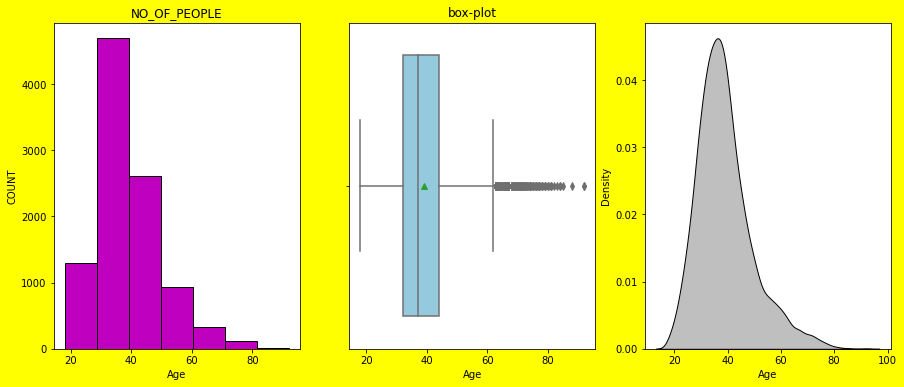

In [164]:
vis_num1("Age")

In [17]:
df['Tenure'].unique() # no dirty data  

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [18]:
df['Balance'].unique() # no dirty data  

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

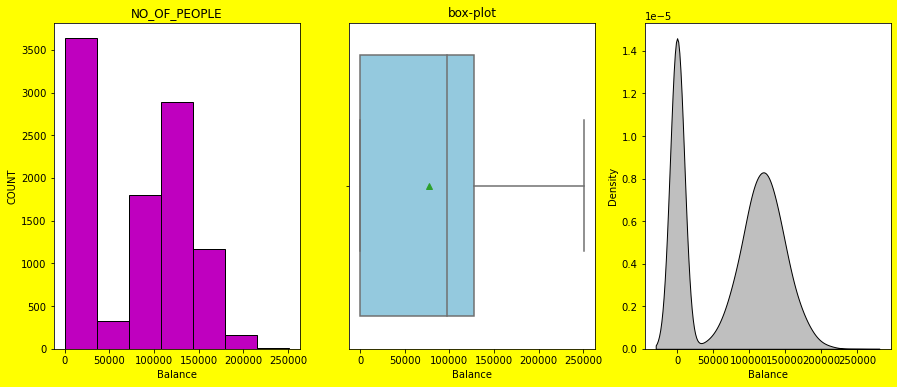

In [165]:
vis_num1("Balance")

In [167]:
df[df['Balance']<1000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,france,Female,42,2,0.0,1,1,1,101348.88,1
3,699,france,Female,39,1,0.0,2,0,0,93826.63,0
6,822,france,Male,50,7,0.0,2,1,1,10062.80,0
11,497,spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,france,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,france,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,france,Male,39,5,0.0,2,1,0,96270.64,0


In [19]:
for i in df['Balance']:
    print(i)

0.0
83807.86
159660.8
0.0
125510.82
113755.78
0.0
115046.74
142051.07
134603.88
102016.72
0.0
0.0
0.0
0.0
143129.41
132602.88
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
136815.64
0.0
141349.43
59697.17
0.0
85311.7
110112.54
0.0
0.0
134264.04
145260.23
76548.6
0.0
70349.48
0.0
122522.32
117419.35
131394.56
155931.11
109421.13
112045.67
137843.8
103391.38
103769.22
116363.37
146050.97
0.0
125561.97
98495.72
125211.92
127864.4
75888.2
0.0
40685.92
136857.0
152328.88
56084.69
78707.16
109166.37
169831.46
101633.04
123180.01
150725.53
98373.26
133745.44
0.0
163607.18
157780.84
0.0
178718.19
0.0
0.0
77253.22
122189.66
96645.54
0.0
0.0
90307.62
0.0
0.0
121681.82
0.0
0.0
81623.67
0.0
118626.55
0.0
0.0
0.0
176273.95
102827.44
97086.4
0.0
0.0
0.0
0.0
82674.15
0.0
0.0
107073.27
88938.62
99806.85
150092.8
92833.89
90536.81
108055.1
100238.35
106190.55
154475.54
132351.29
167864.4
0.0
107818.63
185173.81
129433.34
120193.42
0.0
126384.42
0.0
152603.45
0.0
148507.24
0.0
101827.07
0.0
130862.43
122570.87
0.

107106.33
0.0
0.0
105303.73
165798.1
0.0
126495.57
116393.59
81733.74
0.0
106171.68
96020.86
0.0
181671.16
185709.28
134250.17
0.0
95671.75
0.0
142151.75
127823.93
144164.29
63492.94
0.0
0.0
106134.46
127269.75
124493.03
0.0
146547.78
99610.92
117837.43
168522.37
117337.54
108131.53
136496.12
116324.53
75470.23
172646.82
0.0
160358.68
98415.37
57809.32
128743.8
130806.42
123971.16
0.0
0.0
0.0
0.0
0.0
156297.58
0.0
123372.3
92171.35
0.0
148375.19
0.0
147422.44
173962.32
0.0
145215.43
167539.97
94968.97
106116.5
0.0
0.0
0.0
120018.86
112541.54
166118.45
102882.4
0.0
106881.5
120727.97
169832.57
0.0
113599.42
0.0
0.0
0.0
0.0
146282.79
119413.62
122084.63
103060.63
0.0
0.0
110483.86
120718.28
36566.96
108601.0
0.0
0.0
0.0
0.0
141136.62
108231.37
0.0
144855.34
68432.45
136855.24
44020.89
133060.63
0.0
0.0
97665.61
185013.02
0.0
65971.61
150463.11
0.0
0.0
136425.18
250898.09
146798.81
0.0
128486.91
0.0
143407.29
0.0
76165.65
0.0
0.0
90560.3
62391.22
0.0
0.0
123378.2
99836.47
161434.36
0.0
13

0.0
0.0
117989.76
0.0
137411.29
73688.2
122330.7
99906.89
0.0
167664.83
141525.55
124832.51
132121.71
0.0
78539.84
123770.46
0.0
116150.65
160729.1
88378.6
182888.08
0.0
0.0
85600.08
0.0
0.0
95001.33
113873.22
0.0
74896.92
89492.62
128718.78
0.0
0.0
144954.75
0.0
94001.61
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
141546.35
141528.88
109805.3
86614.06
91680.1
38848.19
153639.11
0.0
123870.07
0.0
46323.57
162039.78
110928.51
0.0
114421.55
130036.21
151510.17
0.0
0.0
83568.55
139972.18
100212.13
90217.07
0.0
124067.32
0.0
162082.31
117306.69
122889.88
148790.61
180226.24
104857.19
166833.86
102936.72
108736.52
129974.79
85982.07
134397.61
137841.53
100260.88
139822.11
123151.51
95331.83
0.0
138162.41
0.0
126066.26
96763.89
0.0
139561.46
0.0
0.0
172463.45
107798.85
70181.48
177997.07
0.0
0.0
0.0
0.0
123200.78
0.0
0.0
137742.9
116270.72
113220.2
0.0
115895.22
121730.49
113811.85
136214.08
146200.01
106242.67
0.0
0.0
24043.45
0.0
132287.92
0.0
0.0
90322.99
0.0
131283.11
131659.59
120952.74
153166.17
5

0.0
0.0
176173.52
0.0
131834.76
92347.96
0.0
95297.11
0.0
0.0
123845.36
143426.34
0.0
112708.2
100013.51
208165.53
0.0
0.0
0.0
121685.31
111525.02
0.0
113546.3
95696.52
88963.31
144880.34
136576.02
63093.01
132271.12
88814.4
90594.55
141816.25
138547.97
52192.08
124976.19
0.0
104356.38
150315.92
129299.28
140950.92
128065.12
107433.48
117468.67
0.0
0.0
0.0
0.0
153040.03
142084.04
0.0
112079.58
132044.6
66582.81
0.0
0.0
0.0
102895.1
0.0
117578.35
198546.1
0.0
0.0
116623.31
0.0
0.0
0.0
105770.7
0.0
94435.45
112889.91
0.0
127940.47
129745.1
0.0
0.0
141535.52
139914.27
120243.49
91835.16
0.0
67178.19
0.0
115378.94
127786.28
0.0
64900.32
109172.88
0.0
114091.38
0.0
0.0
145933.27
131504.73
107926.02
112281.6
0.0
0.0
0.0
124781.67
132865.56
129055.13
96166.88
165298.12
0.0
120682.53
102773.15
144386.32
104449.8
137102.65
142475.87
0.0
103195.2
112070.44
0.0
96473.59
0.0
108437.89
153195.59
96877.21
0.0
0.0
95452.89
63873.56
148298.59
0.0
143258.85
121342.24
99152.73
0.0
68423.89
0.0
79656.81


132077.48
127847.86
0.0
176702.36
83555.58
0.0
0.0
0.0
0.0
96858.35
0.0
0.0
132796.04
154970.54
88902.21
98738.92
0.0
0.0
137456.28
0.0
73937.02
158621.04
113257.2
0.0
116536.43
0.0
101070.69
0.0
127331.46
0.0
0.0
105969.42
119547.46
0.0
138668.18
51582.5
0.0
169902.92
87262.4
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
150348.37
115074.02
0.0
99986.98
110357.0
166685.92
95312.8
202443.47
109493.62
88977.39
104982.57
154110.99
185714.28
116022.53
0.0
164011.48
0.0
101514.89
0.0
0.0
134599.33
147511.26
78396.08
0.0
110581.29
151836.36
83624.55
148197.15
122924.75
72594.0
115221.36
117808.74
147754.68
0.0
113292.17
0.0
115163.38
118098.62
0.0
0.0
120825.7
0.0
0.0
133845.28
0.0
108541.04
0.0
0.0
113817.06
137300.23
158024.38
127837.54
161533.0
161171.7
80958.36
0.0
146193.6
0.0
115021.76
126773.43
92889.91
0.0
146622.35
131038.14
88820.29
115406.97
132951.92
108891.7
141788.63
116954.32
90450.0
125997.22
0.0
0.0
0.0
144637.86
86616.35
0.0
127924.25
0.0
131240.61
0.0
120046.74
97819.36
62979.93
0.0
16

82729.49
142765.24
121172.97
132932.14
123374.46
161371.5
0.0
79563.36
0.0
138232.24
0.0
81571.05
0.0
95927.04
116932.59
0.0
79551.12
116416.94
88141.1
177729.13
0.0
123912.78
0.0
0.0
108306.44
102962.62
103502.22
119654.44
183768.47
0.0
0.0
140900.97
94049.92
98926.4
142872.36
46057.96
119769.77
143244.97
79562.98
0.0
0.0
96659.64
0.0
165947.99
92676.3
83195.12
129387.94
0.0
130233.14
123502.53
140894.06
163867.86
0.0
93816.7
0.0
0.0
114668.89
146756.68
150213.71
111183.53
99816.46
0.0
0.0
0.0
0.0
0.0
86714.06
0.0
132838.07
128707.31
0.0
0.0
123192.12
115248.11
59360.77
0.0
112668.7
138503.51
0.0
0.0
0.0
0.0
157267.95
133871.05
141989.27
0.0
0.0
46388.16
148666.99
115101.5
148363.38
0.0
144102.32
128876.71
118448.15
0.0
0.0
0.0
135979.01
117271.8
0.0
0.0
0.0
129205.49
0.0
0.0
104015.54
0.0
0.0
103873.39
112383.03
117731.79
135827.33
114135.17
0.0
118756.62
98382.72
100520.92
79858.13
0.0
95052.29
177728.55
83116.68
111565.91
83015.71
124511.01
130652.52
0.0
0.0
121854.45
0.0
86893.28


In [20]:
df['NumOfProducts'].unique()  # no dirty data 

array([1, 3, 2, 4], dtype=int64)

In [21]:
df['HasCrCard'].unique()  # no dirty data 

array([1, 0], dtype=int64)

In [22]:
df['IsActiveMember'].unique()   # no dirty data 

array([1, 0], dtype=int64)

In [23]:
df['EstimatedSalary'].unique()  # no dirty data 

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

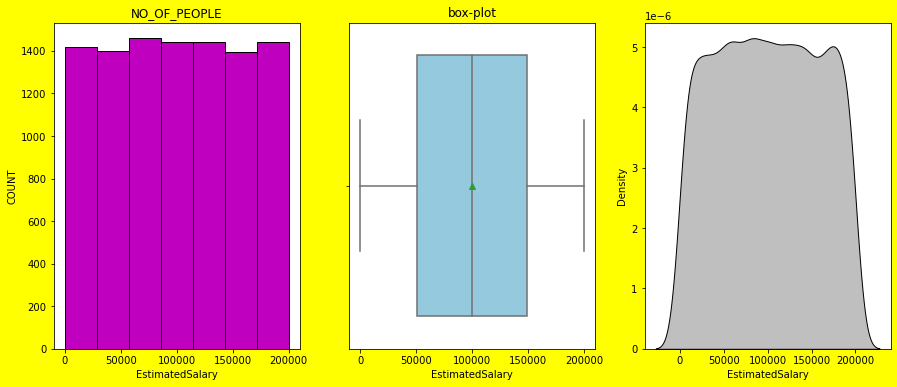

In [168]:
vis_num1("EstimatedSalary")

In [24]:
df['Exited'].unique()   # no dirty data 

array([1, 0], dtype=int64)

In [25]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [181]:
def cat_visual(a):
    plt.figure(figsize = (5,5),facecolor="yellow")
    plt.subplot(121)
    plt.pie(df[a].value_counts().sort_values(),labels = df[a].unique(),autopct = '%.2f%%')
    plt.title(a)
    
    plt.figure(figsize = (5,5),facecolor="skyblue")
    plt.subplot(122)
    sb.countplot(data = df ,x = a,palette = 'inferno' );
    plt.show()

In [180]:
df['Exited'].value_counts().sort_values()

1    2037
0    7963
Name: Exited, dtype: int64

In [179]:
df['Exited'].unique()

array([1, 0], dtype=int64)

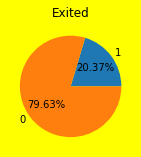

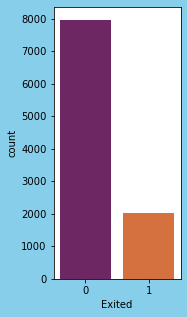

In [182]:
cat_visual("Exited") # imbalance data 

In [26]:
df.shape

(10000, 13)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# DATA EXPLORATION 

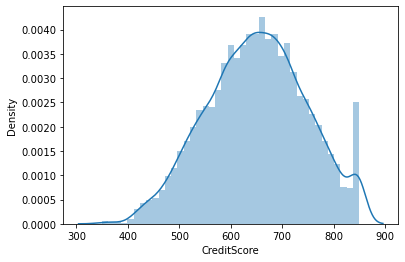

In [28]:
sb.distplot(df['CreditScore']);

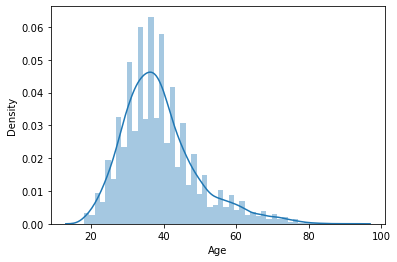

In [29]:
sb.distplot(df['Age']);

In [30]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

####  in our data set , zero rows are there which is having zero age and zero credit score 

   Exited  CreditScore
0       1   645.351497
1       0   651.853196


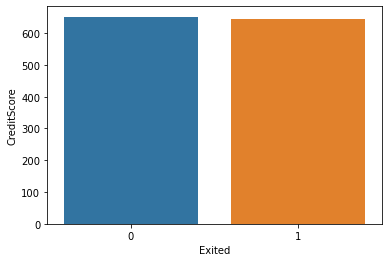

In [32]:
a = df.groupby(by=['Exited'])['CreditScore'].mean().sort_values()
a = a.to_frame().reset_index()
print(a)
sb.barplot(a['Exited'],a['CreditScore']);

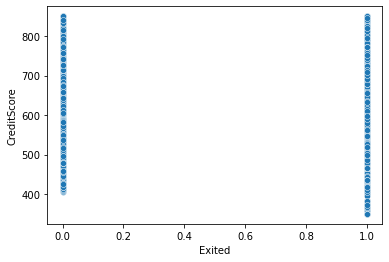

In [33]:
sb.scatterplot(df['Exited'],df['CreditScore']);

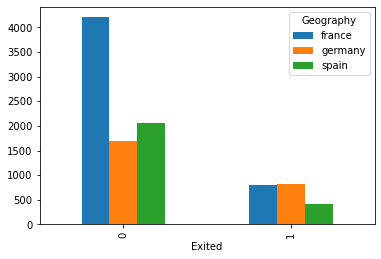

In [34]:

pd.crosstab(index = df['Exited'],
           columns = df['Geography']).plot(kind='bar');

In [35]:
pd.crosstab(index = df['Exited'],
           columns = df['Geography'],
           normalize = 'index')*100

Geography,france,germany,spain
Exited,,,
0,52.794173,21.285948,25.919879
1,39.764359,39.960727,20.274914


In [36]:
# those people who are leaving , those people are mostly from france and germany 

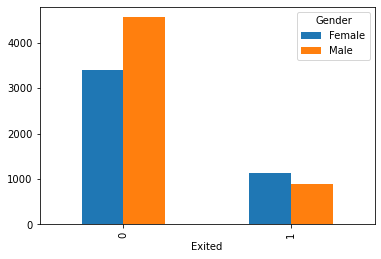

In [37]:
pd.crosstab(index = df['Exited'],
           columns = df['Gender']).plot(kind='bar');

In [38]:
pd.crosstab(index = df['Exited'],
           columns = df['Gender'],
           normalize = 'index')*100

Gender,Female,Male
Exited,,
0,42.747708,57.252292
1,55.915562,44.084438


In [39]:
# more female leaving from our bank 

   Exited        Age
0       0  37.408389
1       1  44.837997


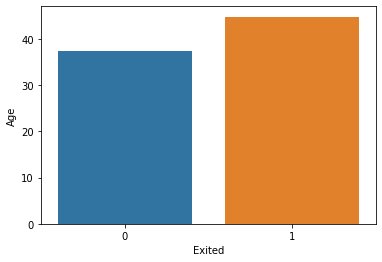

In [40]:
b = df.groupby(by=['Exited'])['Age'].mean().sort_values()
b = b.to_frame().reset_index()
print(b)
sb.barplot(b['Exited'],b['Age']);

In [41]:
# older people are leaving more 

   Exited       Balance
0       0  72745.296779
1       1  91108.539337


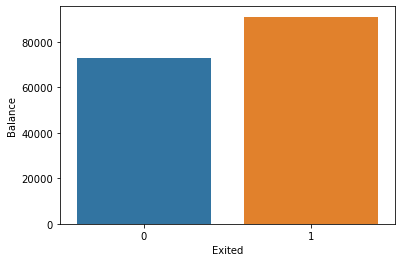

In [42]:
c = df.groupby(by=['Exited'])['Balance'].mean().sort_values()
c = c.to_frame().reset_index()
print(c)
sb.barplot(c['Exited'],c['Balance']);

In [43]:
# people who have more balance are leaving more 

   Exited    Tenure
0       1  4.932744
1       0  5.033279


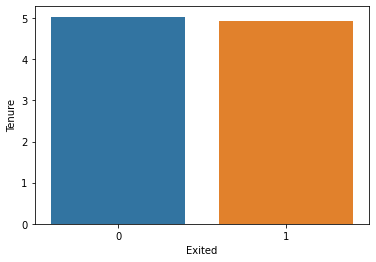

In [44]:
d = df.groupby(by=['Exited'])['Tenure'].mean().sort_values()
d = d.to_frame().reset_index()
print(d)
sb.barplot(d['Exited'],d['Tenure']);

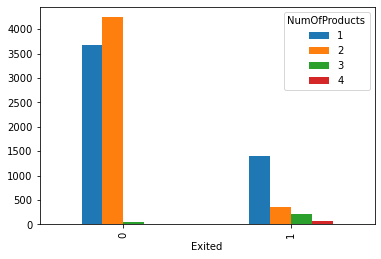

In [45]:
pd.crosstab(index = df['Exited'],
           columns = df['NumOfProducts']).plot(kind='bar');

In [46]:
# those who are leaving are using less product 

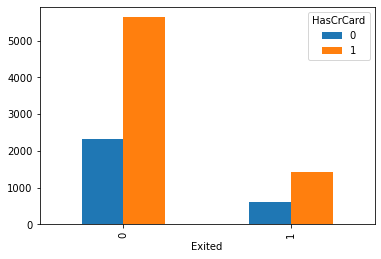

In [47]:
pd.crosstab(index = df['Exited'],
           columns = df['HasCrCard']).plot(kind='bar');

In [48]:
# more people are leaving who does not have credit card 

   Exited  EstimatedSalary
0       0         99645.04
1       1        102460.84


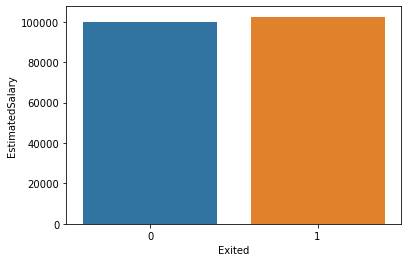

In [49]:
e = df.groupby(by=['Exited'])['EstimatedSalary'].median().sort_values()
e = e.to_frame().reset_index()
print(e)
sb.barplot(e['Exited'],e['EstimatedSalary']);

In [50]:
cols1 = ['CustomerId', 'Surname']

In [51]:
df.drop(cols1,axis=1,inplace =True)

In [52]:
df.shape

(10000, 11)

In [53]:
# prepairing data for machine learning model 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [55]:
ml = df.copy()

In [56]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [57]:
ml.Geography=ml.Geography.astype('category')
ml.Gender=ml.Gender.astype('category')


In [58]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [59]:
from sklearn import preprocessing 
label_encoder=preprocessing.LabelEncoder()
# Encode Label in column 'species 
ml['Geography']=label_encoder.fit_transform(ml['Geography'])
ml['Gender']=label_encoder.fit_transform(ml['Gender'])

In [60]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [61]:
# scailing 

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [63]:
# defining method to perform data scaling operation based on the type of scaling 
def feature_scale(scale):
  numerics=['int16','int32','int64','float16','float32','float64']
  new_df=ml.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler= MinMaxScaler()
  else:
    scaler=StandardScaler()
  df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
  return df_scaled

In [64]:
# scaling data using minmax scaling process
scale='minmax'
scaled_df=feature_scale(scale)
scaled_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [65]:
scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


## identifying the independent and dependent features 

In [66]:
x = scaled_df.iloc[:,0:10]
y = scaled_df.iloc[:,-1]

### data frame 

In [67]:
print(x.shape)
print(y.shape)

(10000, 10)
(10000,)


In [68]:
x.head()
y = y.to_frame()
y.head()

,Exited
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [69]:
x.shape

(10000, 10)

In [70]:
y.shape

(10000, 1)

### numpy 

In [71]:
x_n = scaled_df.iloc[:,0:10].values
y_n = scaled_df.iloc[:,-1].values
print(x_n.shape)
print(y_n.shape)

(10000, 10)
(10000,)


In [72]:
correlation = scaled_df.corr()
correlation

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


# splitting the data for traininjg and testing 

In [73]:
# train_test split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_n,y_n,test_size =.3 ,random_state = 30 )
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7000, 10) (3000, 10) (7000,) (3000,)


In [74]:
scaled_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.3 ,random_state = i )
    lg=LogisticRegression()
    model1=lg.fit(x_train,y_train)
    y_pred=model1.predict(x_test)
#     print("r2 score",r2_score(y_test,y_predict))
    scores.append(model1.score(x_test,y_test))
#     test_accuracy=round(model1.score(x_test,y_test)*100,2)

In [77]:
test_accuracy=round(model1.score(x_test,y_test)*100,2)
print(test_accuracy)
train_accuracy=round(model1.score(x_train,y_train)*100,2)
print(train_accuracy)

81.03
80.54


In [78]:
scores

[0.803,
 0.8063333333333333,
 0.8086666666666666,
 0.804,
 0.817,
 0.812,
 0.797,
 0.8126666666666666,
 0.8083333333333333,
 0.8046666666666666,
 0.7976666666666666,
 0.8043333333333333,
 0.8,
 0.8056666666666666,
 0.8066666666666666,
 0.811,
 0.8046666666666666,
 0.8063333333333333,
 0.8076666666666666,
 0.8046666666666666,
 0.8106666666666666,
 0.804,
 0.808,
 0.8073333333333333,
 0.8143333333333334,
 0.8156666666666667,
 0.8156666666666667,
 0.811,
 0.8066666666666666,
 0.8016666666666666,
 0.8003333333333333,
 0.8116666666666666,
 0.8033333333333333,
 0.8106666666666666,
 0.8053333333333333,
 0.8056666666666666,
 0.7993333333333333,
 0.8116666666666666,
 0.809,
 0.82,
 0.8076666666666666,
 0.804,
 0.817,
 0.8083333333333333,
 0.8036666666666666,
 0.81,
 0.8046666666666666,
 0.8036666666666666,
 0.8033333333333333,
 0.7976666666666666,
 0.8173333333333334,
 0.8,
 0.808,
 0.81,
 0.8213333333333334,
 0.812,
 0.8146666666666667,
 0.8,
 0.807,
 0.8106666666666666,
 0.8163333333333334,
 

In [79]:
np.argmax(scores)

865

In [80]:
# train_test split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_n,y_n,test_size =.3 ,random_state = 865 )
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7000, 10) (3000, 10) (7000,) (3000,)


# logistic regression 

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()


In [83]:
model1=lg.fit(x_train,y_train)

model1

LogisticRegression()

In [112]:

train_accuracy=round(model1.score(x_train,y_train)*100,2)
print(train_accuracy)     # train accuracy of the model

s1_train = train_accuracy
s1_train

80.01


80.01

In [113]:
test_accuracy=round(model1.score(x_test,y_test)*100,2)
print(test_accuracy)
s1_test = test_accuracy

82.6


In [86]:
# slope and intercept
model1.coef_[0]

array([-0.41618401,  0.20803051, -0.48939773,  5.18322058, -0.14407382,
        1.29863194, -0.02333474, -0.01773738, -1.02312256,  0.11571372])

In [87]:
model1.intercept_

array([-2.43748963])

In [88]:
y_pred=model1.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[2363   63]
 [ 459  115]]


In [127]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


print('accuracy: ',accuracy_score(y_test,y_pred))
print('Recall: ',round(recall_score(y_test,y_pred)*100,2))
print('f1_score: ',round(f1_score(y_test,y_pred)*100,2))
print('precision: ',round(precision_score(y_test,y_pred)*100,2))


s1_Recall = round(recall_score(y_test,y_pred)*100,2)
s1_f1_score = round(f1_score(y_test,y_pred)*100,2)
s1_precision = round(precision_score(y_test,y_pred)*100,2)


accuracy:  0.826
Recall:  20.03
f1_score:  30.59
precision:  64.61


# ROC(AUC)

In [91]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,model1.predict_proba(x_test)[:,1])
roc

0.7475267930750206

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.748


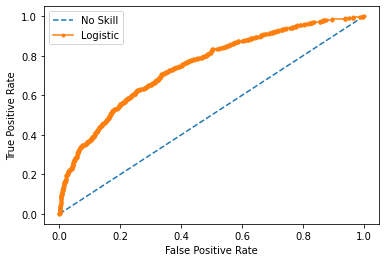

In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model1.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)   # no skill line
lr_auc = roc_auc_score(y_test, lr_probs)      # logistic regression line
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [93]:
# train_test split 
from sklearn.model_selection import train_test_split 
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size =.3 ,random_state = 865 )
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(7000, 10) (3000, 10) (7000, 1) (3000, 1)


In [94]:
x_train1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3987,0.566,0.0,1.0,0.256757,0.7,0.564159,0.000000,1.0,1.0,0.624152
5307,0.368,0.0,0.0,0.418919,0.7,0.000000,0.000000,1.0,0.0,0.067781
6629,0.458,0.0,1.0,0.283784,0.5,0.000000,0.333333,0.0,1.0,0.199420
5284,0.790,0.5,1.0,0.445946,0.3,0.395315,0.000000,1.0,1.0,0.144567
4518,1.000,1.0,0.0,0.148649,0.7,0.000000,0.333333,1.0,0.0,0.116139
...,...,...,...,...,...,...,...,...,...,...
834,0.566,0.0,0.0,0.162162,0.6,0.000000,0.333333,0.0,0.0,0.208173
3460,0.240,0.5,1.0,0.283784,0.5,0.468198,0.333333,0.0,0.0,0.318502
9810,0.724,1.0,1.0,0.121622,1.0,0.000000,0.000000,1.0,0.0,0.472712
1880,0.478,0.5,0.0,0.243243,0.9,0.559413,0.333333,1.0,0.0,0.681657


In [95]:
y_train1

,Exited
3987,0.0
5307,1.0
6629,0.0
5284,0.0
4518,0.0
...,...
834,0.0
3460,0.0
9810,0.0
1880,0.0


# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
# x_train1=x_train1.values.reshape(-1,1)
# y_train1=y_train1.values.reshape(-1,1)
# x_test1=x_test1.values.reshape(-1,1)

In [98]:
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(7000, 10) (3000, 10) (7000, 1) (3000, 1)


In [99]:
# 2nd method for finding the value of k 
accuracy = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1, y_train1)
    accuracy.append(accuracy_score(y_test1,knn.predict(x_test1)))

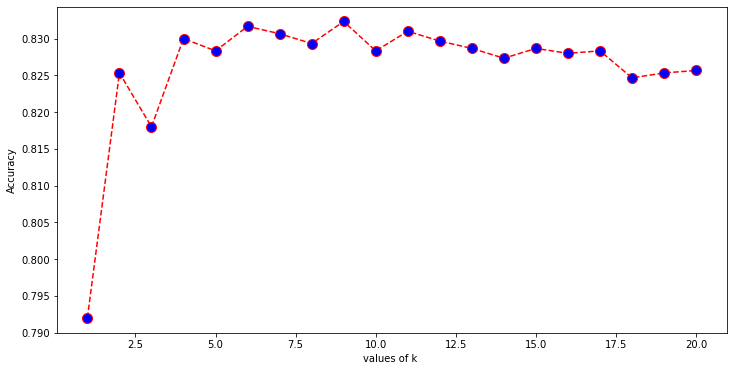

In [100]:
plt.figure(figsize=(12,6))
plt.ylabel("Accuracy")
plt.xlabel("values of k ")
plt.plot(range(1,21),accuracy,color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10);

In [101]:
k2 = 9
knn = KNeighborsClassifier(n_neighbors=k2)
knn.fit(x_train1, y_train1)
y_pred1 = knn.predict(x_test1)

In [102]:
round(accuracy_score(y_test1,y_pred1)*100,2)

83.23

In [118]:
s2_train = round(accuracy_score(y_test1,y_pred1)*100,2)
s2_train

83.23

In [103]:
round(accuracy_score(y_train1,knn.predict(x_train1))*100,2)

83.81

In [119]:
s2_test = round(accuracy_score(y_train1,knn.predict(x_train1))*100,2)
s2_test

83.81

In [128]:
print('accuracy: ',accuracy_score(y_test1,y_pred1))
print('Recall: ',round(recall_score(y_test1,y_pred1)*100,2))
print('f1_score: ',round(f1_score(y_test1,y_pred1)*100,2))
print('precision: ',round(precision_score(y_test1,y_pred1)*100,2))


s2_Recall = round(recall_score(y_test1,y_pred1)*100,2)
s2_f1_score = round(f1_score(y_test1,y_pred1)*100,2)
s2_precision = round(precision_score(y_test1,y_pred1)*100,2)


accuracy:  0.8323333333333334
Recall:  27.35
f1_score:  38.43
precision:  64.61


# naive bayes 

In [104]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
model2=clf.fit(x_train,y_train)
model2
y_pred2=clf.predict(x_test)
y_pred2
round(accuracy_score(y_test,y_pred2)*100,2)

84.6

In [120]:
s3_test = round(accuracy_score(y_test,y_pred2)*100,2)
s3_test

84.6

In [121]:
round(accuracy_score(y_train1,clf.predict(x_train1))*100,2)

82.53

In [122]:
s3_train =round(accuracy_score(y_train1,clf.predict(x_train1))*100,2)
s3_train

82.53

In [129]:
print('accuracy: ',accuracy_score(y_test,y_pred2))
print('Recall: ',round(recall_score(y_test,y_pred2)*100,2))
print('f1_score: ',round(f1_score(y_test,y_pred2)*100,2))
print('precision: ',round(precision_score(y_test,y_pred2)*100,2))


s3_Recall = round(recall_score(y_test,y_pred2)*100,2)
s3_f1_score = round(f1_score(y_test,y_pred2)*100,2)
s3_precision = round(precision_score(y_test,y_pred2)*100,2)


accuracy:  0.846
Recall:  26.83
f1_score:  40.0
precision:  78.57


#  Random forest classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier


rc=RandomForestClassifier()

model3=rc.fit(x_train,y_train)
model3
y_pred3=rc.predict(x_test)
y_pred3
score3=round(accuracy_score(y_test,y_pred3)*100,2)
score3

s4_train =round(accuracy_score(y_train,rc.predict(x_train))*100,2)
s4_train

s4_test = round(accuracy_score(y_test,y_pred3)*100,2)
s4_test

86.7

In [131]:
s4_train =round(accuracy_score(y_train,rc.predict(x_train))*100,2)
s4_train

100.0

In [132]:
s4_test = round(accuracy_score(y_test,y_pred3)*100,2)
s4_test

86.7

# GridSearchCV

In [150]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train


In [151]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [152]:

rf = RandomForestClassifier()

In [153]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)


In [154]:

rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [155]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 60}

In [156]:
rf_grid.best_score_

0.8567142857142857

In [159]:
from sklearn.ensemble import RandomForestClassifier


rc=RandomForestClassifier(max_depth = 8, max_features=  0.6, max_samples= 1.0, n_estimators= 60)

model3=rc.fit(x_train,y_train)
model3
y_pred3=rc.predict(x_test)
y_pred3
score3=round(accuracy_score(y_test,y_pred3)*100,2)
score3




86.8

In [160]:
s4_train_cv =round(accuracy_score(y_train,rc.predict(x_train))*100,2)
s4_train_cv


88.14

In [161]:

s4_test_cv = round(accuracy_score(y_test,y_pred3)*100,2)
s4_test_cv

86.8

In [130]:
print('accuracy: ',accuracy_score(y_test,y_pred3))
print('Recall: ',round(recall_score(y_test,y_pred3)*100,2))
print('f1_score: ',round(f1_score(y_test,y_pred3)*100,2))
print('precision: ',round(precision_score(y_test,y_pred3)*100,2))


s4_Recall = round(recall_score(y_test,y_pred3)*100,2)
s4_f1_score = round(f1_score(y_test,y_pred3)*100,2)
s4_precision = round(precision_score(y_test,y_pred3)*100,2)


accuracy:  0.867
Recall:  47.91
f1_score:  57.96
precision:  73.33


# adaboost

In [107]:
from sklearn.ensemble import AdaBoostClassifier
ac=AdaBoostClassifier()
model4=ac.fit(x_train,y_train)
model4
y_pred4=ac.predict(x_test)
y_pred4
score4=round(accuracy_score(y_test,y_pred4)*100,2)
score4

85.9

In [133]:
s5_train =round(accuracy_score(y_train,ac.predict(x_train))*100,2)
s5_train

85.63

In [134]:
s5_test = round(accuracy_score(y_test,y_pred4)*100,2)
s5_test

85.9

In [141]:
print('accuracy: ',accuracy_score(y_test,y_pred4))
print('Recall: ',round(recall_score(y_test,y_pred4)*100,2))
print('f1_score: ',round(f1_score(y_test,y_pred4)*100,2))
print('precision: ',round(precision_score(y_test,y_pred3)*100,2))


s5_Recall = round(recall_score(y_test,y_pred4)*100,2)
s5_f1_score = round(f1_score(y_test,y_pred4)*100,2)
s5_precision = round(precision_score(y_test,y_pred4)*100,2)


accuracy:  0.859
Recall:  47.04
f1_score:  56.07
precision:  73.33


# bagging classifier

In [108]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
model5=bc.fit(x_train,y_train)
model5
y_pred5=bc.predict(x_test)
y_pred5
score5=round(accuracy_score(y_test,y_pred5)*100,2)
score5

85.8

In [135]:
s6_train =round(accuracy_score(y_train,bc.predict(x_train))*100,2)
s6_train

98.5

In [136]:
s6_test = round(accuracy_score(y_test,y_pred5)*100,2)
s6_test

85.8

In [143]:
print('accuracy: ',accuracy_score(y_test,y_pred5))
print('Recall: ',round(recall_score(y_test,y_pred5)*100,2))
print('f1_score: ',round(f1_score(y_test,y_pred5)*100,2))
print('precision: ',round(precision_score(y_test,y_pred5)*100,2))


s6_Recall = round(recall_score(y_test,y_pred5)*100,2)
s6_f1_score = round(f1_score(y_test,y_pred5)*100,2)
s6_precision = round(precision_score(y_test,y_pred5)*100,2)


accuracy:  0.858
Recall:  47.74
f1_score:  56.26
precision:  68.5


In [109]:
RESULTS = pd.DataFrame()

In [110]:
RESULTS['MODELS'] = ['LOGISTIC_REGRESSION','KNN','NAIVE_BAYES','RANDOM_FOREST','ADABOOST','BAGGING']

In [137]:
RESULTS['TRAIN_SCORE'] = s1_train,s2_train,s3_train,s4_train,s5_train,s6_train

In [138]:
RESULTS['TEST_SCORE'] = s1_test,s2_test,s3_test,s4_test,s5_test,s6_test

In [139]:
RESULTS

,MODELS,TRAIN_SCORE,TEST_SCORE
0,LOGISTIC_REGRESSION,80.01,82.60
1,KNN,83.23,83.81
2,NAIVE_BAYES,82.53,84.60
3,RANDOM_FOREST,100.00,86.70
4,ADABOOST,85.63,85.90
5,BAGGING,98.50,85.80


In [144]:
RESULTS['Recall'] = s1_Recall,s2_Recall,s3_Recall,s4_Recall,s5_Recall,s6_Recall

In [145]:
RESULTS['f1_score'] = s1_f1_score,s2_f1_score,s3_f1_score,s4_f1_score,s5_f1_score,s6_f1_score

In [147]:
RESULTS['precision'] = s1_precision,s2_precision,s3_precision,s4_precision,s5_precision,s6_precision

In [148]:
RESULTS

,MODELS,TRAIN_SCORE,TEST_SCORE,Recall,f1_score,precision
0,LOGISTIC_REGRESSION,80.01,82.60,20.03,30.59,64.61
1,KNN,83.23,83.81,27.35,38.43,64.61
2,NAIVE_BAYES,82.53,84.60,26.83,40.00,78.57
3,RANDOM_FOREST,100.00,86.70,47.91,57.96,73.33
4,ADABOOST,85.63,85.90,47.04,56.07,69.41
5,BAGGING,98.50,85.80,47.74,56.26,68.50


In [149]:
RESULTS.sort_values(by = 'TEST_SCORE',ascending = False)

,MODELS,TRAIN_SCORE,TEST_SCORE,Recall,f1_score,precision
3,RANDOM_FOREST,100.00,86.70,47.91,57.96,73.33
4,ADABOOST,85.63,85.90,47.04,56.07,69.41
5,BAGGING,98.50,85.80,47.74,56.26,68.50
2,NAIVE_BAYES,82.53,84.60,26.83,40.00,78.57
1,KNN,83.23,83.81,27.35,38.43,64.61
0,LOGISTIC_REGRESSION,80.01,82.60,20.03,30.59,64.61
